 Análise de Logs

A série temporal é uma coleção de pontos de dados coletados em intervalos de tempo constantes. 





In [9]:
import pandas as pd

dateparse = lambda dates: pd.to_datetime(dates)

df = pd.read_csv('logs2.csv', parse_dates = ['segundo'], index_col = 'segundo', date_parser = dateparse)

In [10]:
df.describe()

requisicoes
count   501.000000
mean    220.808383
std     169.851509
min       6.000000
25%      78.000000
50%      87.000000
75%     365.000000
max     456.000000

In [11]:
df.tail()


requisicoes
segundo                         
2020-09-15 08:16:41          234
2020-09-15 08:17:41           54
2020-09-15 08:18:41            6
2020-09-15 08:19:41          345
2020-09-15 08:21:41           45

Text(0, 0.5, 'Requisições')

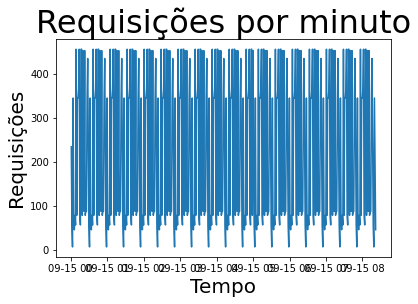

In [12]:
import matplotlib.pylab as plt

ts = df["requisicoes"]

plt.title(label="Requisições por minuto", fontsize=32)
plt.plot(ts)
plt.xlabel("Tempo", fontsize=20)
plt.ylabel("Requisições", fontsize=20)

Text(0, 0.5, 'Requisições')

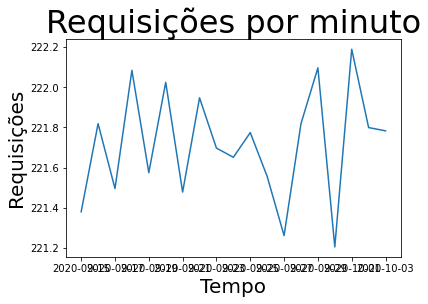

In [5]:
ts_1d = ts.resample('D', closed='right', label='left').mean()

plt.title(label="Requisições por minuto", fontsize=32)
plt.plot(ts_1d)
plt.xlabel("Tempo", fontsize=20)
plt.ylabel("Requisições", fontsize=20)

Text(0, 0.5, 'Requisições')

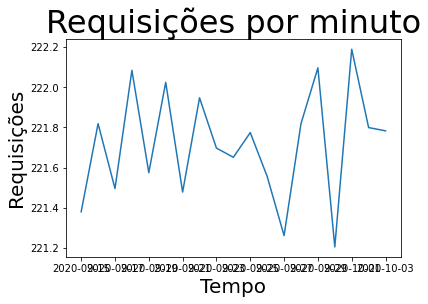

In [6]:
ts_1d = ts.resample('D', closed='right', label='left').mean()

plt.title(label="Requisições por minuto", fontsize=32)
plt.plot(ts_1d)
plt.xlabel("Tempo", fontsize=20)
plt.ylabel("Requisições", fontsize=20)

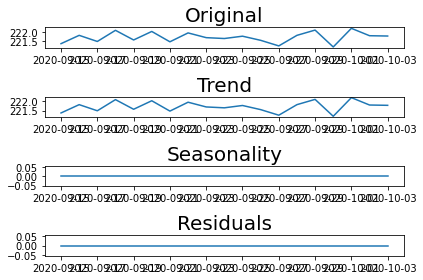

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decompose_analysis(timeseries, model, periods):
    decomposition = seasonal_decompose(timeseries, model = model, period = 1)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(411)
    plt.title('Original', fontsize=20)
    plt.plot(timeseries, label='Original')
    plt.subplot(412)
    plt.title('Trend', fontsize=20)
    plt.plot(trend, label='Trend')
    plt.subplot(413)
    plt.title('Seasonality', fontsize=20)
    plt.plot(seasonal,label='Seasonality')
    plt.subplot(414)
    plt.title('Residuals', fontsize=20)
    plt.plot(residual, label='Residuals')
    plt.tight_layout()
    
    return decomposition
    
seasonal_decompose_analysis(ts_1d, 'additive', 365)

In [8]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries, rolling_window):
    rolling_mean = pd.rolling_mean(timeseries, window=rolling_window)
    rolling_std = pd.rolling_std(timeseries, window=rolling_window)

    orig = plt.plot(timeseries, color='blue', label= 'Original')
    mean = plt.plot(rolling_mean, color='red', label= 'Rolling Mean')
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    test = adfuller(timeseries, autolag='AIC')
    output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)
    
stationarity_test(timeseries = ts_1d, rolling_window = 365)

AttributeError: module 'pandas' has no attribute 'rolling_mean'